## **Probability Density Function (PDF), Cumulative Distribution Function (CDF) & Probability Mass Function (PMF)**

* PDF helps us understand how likely specific scores are in a continuous distribution.
* CDF helps us understand the cumulative likelihood of scoring up to a certain point.
*  PMF tells you the probability of each possible value that a discrete random variable can take

Note: When calculating the Cumulative Distribution Function (CDF) and Probability Density Function (PDF) for a continuous random variable, you typically use the theoretical or "real" values of the random variable (x) within the _**range of the distribution**_.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson, stats

In [2]:
#Let us create a dataset of exam scores in MLDM for a hypothetical class of 100
data = {"Student ID":range(1,101),"Exam_Score":np.random.randint(30,100,100)}

data_exams = pd.DataFrame(data)

data_exams.head()

,Student ID,Exam_Score
0,1,97
1,2,61
2,3,75
3,4,87
4,5,57


In [3]:
#Let convert the score to a numpy array
score_arry = np.array(data_exams["Exam_Score"])#pass vaue
score_arry

array([97, 61, 75, 87, 57, 57, 85, 38, 68, 88, 42, 85, 54, 37, 55, 82, 73,
       33, 93, 74, 43, 55, 63, 58, 51, 47, 82, 88, 44, 65, 83, 40, 60, 58,
       88, 41, 38, 51, 44, 57, 56, 47, 94, 97, 80, 67, 83, 85, 65, 63, 31,
       80, 37, 89, 33, 97, 69, 42, 34, 84, 93, 67, 81, 52, 45, 49, 38, 46,
       61, 60, 44, 72, 75, 42, 45, 61, 56, 35, 46, 32, 73, 76, 44, 70, 53,
       57, 88, 37, 78, 47, 31, 81, 75, 91, 47, 84, 51, 66, 74, 65])

In [4]:
#Let get the mean, Max, Mean, Std of exams

mean_score = score_arry.mean() # Mean exams score
stddev_score = score_arry.std()

print("Max. exams score: ", score_arry.max())

print("Min. exams score: ", score_arry.min())

print("Mean value of exams score: ", mean_score)

print("Standard deviation of exams score: ", stddev_score )

Max. exams score:  97
Min. exams score:  31
Mean value of exams score:  62.18
Standard deviation of exams score:  18.825185258052574


## **Probability Density Function (PDF)**

* The PDF describes the probability density at each possible value of the continuous random variable. 
* Mathematically, it's represented as f(x), where x represents the theoretical values that the random variable can take. 
* The PDF tells you how likely it is for the random variable to take on a particular value within its range.
    * For example, if you have a continuous random variable representing exam scores on a scale of 0 to 100, the PDF would provide information about the likelihood of getting a specific score, such as 85. In this case, x would be 85, which is a theoretical value within the range.

* Let say we want to know how common each score is in our exams score dataset. 

* To do this, we create a PDF, which is like a "smoothed" histogram that shows the likelihood of getting each score. 
* Higher points on the PDF mean that a score is more common.

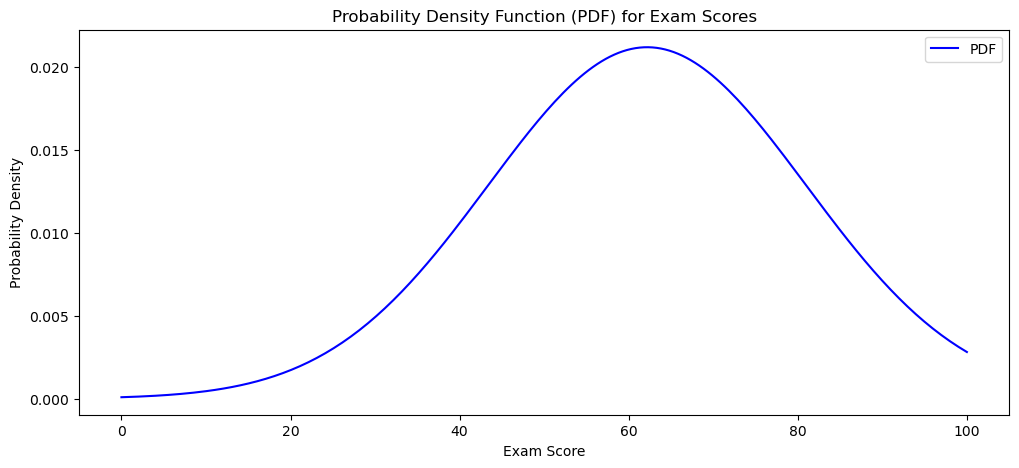

In [5]:
# Calculate PDF for Normal distribution (assuming a Normal distribution)

x_values = np.linspace(0,100,200) #set values
#creating an array of 200 evenly spaced values between 0 and 100. 
#suitable for representing exam scores on a scale of 0 to 100. 

pdf_values = norm.pdf(x_values, loc=mean_score, scale=stddev_score)

# Plot PDF
plt.figure(figsize=(12,5)) #set size

plt.plot(x_values, pdf_values, color='blue', label='PDF')

plt.title('Probability Density Function (PDF) for Exam Scores')

plt.xlabel('Exam Score')

plt.ylabel('Probability Density')

plt.legend()

plt.show()

* If you look at the PDF plot, you will notice that it shows the likelihood of getting each exam score. 
* Scores around the mean (average) have higher PDF values, indicating they are more common (i.e. many students scored around 66)
* Scores far from the mean have lower PDF values because they are less common (i.e. fewer students scored).

## **Cumulative Distribution Function (CDF)**

* The CDF, on the other hand, gives you the cumulative probability up to a specific value of the continuous random variable. 
* It's represented as F(x), where x represents a theoretical value within the range.

* For instance, if you want to know the cumulative probability of scoring 85 or lower on an exam, you would use the CDF. 
* In this case, x would be 85, and the CDF would provide the cumulative probability up to that score.

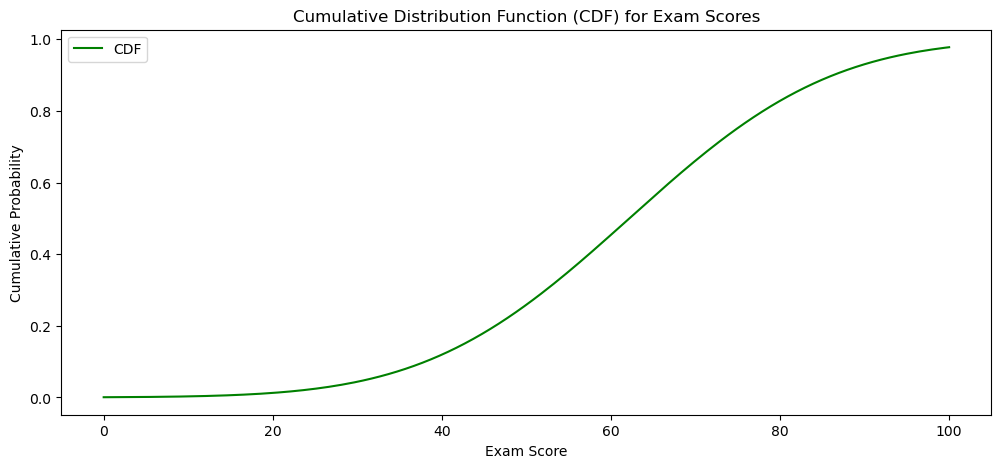

In [6]:
# Calculate CDF for Normal distribution
cdf_values = norm.cdf(x_values, loc=mean_score, scale=stddev_score) #pass value

# Plot CDF
plt.figure(figsize=(12,5))#set size
plt.plot(x_values, cdf_values, color='green', label='CDF')
plt.title('Cumulative Distribution Function (CDF) for Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

* If you look at the CDF plot, you can see how it accumulates the probabilities as you move to the right along the x-axis (exam scores). 
* For example, if you look at a score of 70 on the x-axis, the CDF value tells you the probability of scoring 70 or lower.

### **Note:**

* In both cases, you're working with theoretical values of the random variable x within the range of the distribution. 
* These functions help you understand the distribution's behavior and provide information about the likelihood of different outcomes or cumulative probabilities based on those theoretical values.
* Both PDF and CDF are valuable tools for analyzing and visualizing data distributions, like exam scores, to gain insights into how scores are distributed and the likelihood of achieving different results.

* It's important to note that when dealing with real data, you often use these functions for theoretical values within the range even if no data point corresponds precisely to a theoretical value. 

* In practice, you may round or interpolate to estimate probabilities or cumulative probabilities for specific data points.



## **Probability Mass Function (PMF)**

* A Probability Mass Function is a concept used in probability theory and statistics, particularly when dealing with discrete random variables. 
* It is a mathematical function that describes the probability distribution of a discrete random variable by assigning a probability to each possible outcome or "mass" in the sample space.

* In simpler terms, the PMF tells you the probability of each possible value that a discrete random variable can take. 
 * For example, if you're rolling a fair six-sided die, the PMF for this random variable would assign a probability of 1/6 to each of the six possible outcomes (the numbers 1 through 6).

Mathematically, the PMF is typically denoted as $$P(X = x)$$, 
where:
* P(X = x)represents the probability of the random variable X taking on a specific value x.
* X is the random variable.
* x represents a specific value that X can take.

The PMF must satisfy two important properties:
1. Each probability assigned by the PMF must be between 0 and 1.
2. The sum of all the probabilities assigned by the PMF to all possible outcomes must equal 1. 

This ensures that the random variable will definitely take on one of the possible values.

Probability Mass Function is a fundamental concept in probability and statistics used to describe the probability distribution of discrete random variables, helping us understand the likelihood of various outcomes in a discrete sample space.


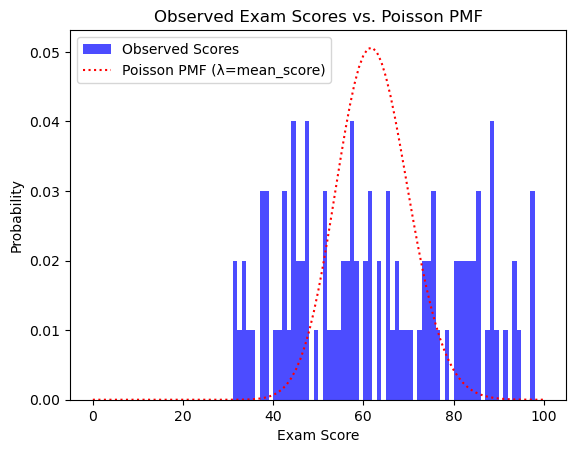

In [9]:
# Generate values for x (possible scores) from 0 to 100
x_values = np.arange(0,101) #set values

# Calculate Poisson PMF for the observed mean score
poisson_pmf = poisson.pmf(x_values,mu=mean_score) #set values

# Create a histogram of observed exam scores
plt.hist(score_arry, bins=range(101), density=True, alpha=0.7, 
         color='blue', label='Observed Scores')

# Plot the Poisson PMF
plt.plot(x_values, poisson_pmf, color='red', linestyle='dotted', 
         label='Poisson PMF (λ=mean_score)')

# Add labels and legend
plt.title('Observed Exam Scores vs. Poisson PMF')
plt.xlabel('Exam Score')
plt.ylabel('Probability')
plt.legend()
plt.show()

* The Poisson PMF represents the probability of each possible score based on the mean score. 
* It allows us to see how well the Poisson distribution fits the observed data.
* The histogram represents the actual distribution of exam scores, and the red dotted line represents the Poisson PMF. 
* If the Poisson distribution fits well, the red line should closely match the histogram bars. 
* This comparison helps you assess how well the Poisson distribution models the observed data.

## **A/B test (dependent-samples t-test)**

In [11]:
#Let say we have the exams score for two student
courses =["Course 1","Course 2","Course 3","Course 4","Course 5","Course 6"]

studentA = np.random.randint(70,101,6)#set values

studentB = np.random.randint(72,101,6)#set values

data_stu = {"Course":courses,"studentA":studentA,"studentB":studentB}#set values

Df_stu = pd.DataFrame(data_stu)

Df_stu.head()

,Course,studentA,studentB
0,Course 1,94,85
1,Course 2,75,82
2,Course 3,75,90
3,Course 4,77,72
4,Course 5,92,99


Determine if there is a significant difference in the exam scores between Student A and Student B for each course. 
To do this, you can perform a paired t-test, which is used to compare the means of paired samples (in this case, Student A's and Student B's scores for each course).

In [14]:
# Exam scores for Student A and Student B for six courses
student_A_scores = np.array(Df_stu["studentA"])#set value

student_B_scores = np.array(Df_stu["studentB"])#set value

# Perform the paired t-test
# function to perform the paired t-test. 
# This function calculates the t-statistic and p-value for the paired data
t_statistic, p_value = stats.ttest_rel(student_A_scores, student_B_scores)

/var/folders/c5/q_czkdq95s75ykt7g78wnm1r0000gn/T/ipykernel_1167/134278990.py:9: DeprecationWarning: Please use `ttest_rel` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_statistic, p_value = stats.ttest_rel(student_A_scores, student_B_scores)


In [15]:
# Print the results
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 0.1863
P-value: 0.8595


In [16]:
# Determine the significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the H0: There is a significant difference in scores.")
else:
    print("Fail to reject the H0: There is no significant difference in scores.")

Fail to reject the H0: There is no significant difference in scores.


* The null hypothesis (H0) would typically be that there is no significant difference in the scores between the two students for each course.

* The results of the t-test will include the t-statistic and p-value. 
* If the p-value is below a certain significance level (e.g., 0.05), you may conclude that there is a statistically significant difference in the scores between Student A and Student B for the given courses.

* Keep in mind that the paired t-test assumes that the observations are paired or matched in some way (in this case, by course), and it tests if the mean difference between the pairs is significantly different from zero.

* Please note that the appropriateness of the t-test and the interpretation of results should be done carefully, considering the specific context of your data and research question.